In [67]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# import our dataset
df = pd.read_csv(r'C:\Users\ricky\Downloads\archive (2)\top 120 best-selling mobile phones.csv', index_col=False)

In [78]:
df

,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,Nokia,1100,Bar,False,2003,250.0
1,Nokia,1110,Bar,False,2005,247.5
2,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,Nokia,105 Series,Bar,False,2013,200.0
4,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
...,...,...,...,...,...,...
115,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7
116,Samsung,Samsung Galaxy S24,Touchscreen,True,2024,2.4
117,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2
118,Google,Pixel & Pixel XL,Touchscreen,True,2016,2.1


Data Cleaning

In [72]:
#Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0%
Manufacturer - 0%
Model - 0%
Form Factor - 0%
Smartphone? - 0%
Year - 0%
Units Sold (million ) - 0%


In [74]:
df.dtypes

Rank                       int64
Manufacturer              object
Model                     object
Form Factor               object
Smartphone?                 bool
Year                       int64
Units Sold (million )    float64
dtype: object

In [76]:
#Remove Rank collumn since we don't need it here
df = df.drop('Rank', axis=1)

In [82]:
#Remove duplicates value in Model column
df = df.drop_duplicates(subset=['Model'], keep='first')

In [86]:
pd.set_option('display.max_rows', None)

In [88]:
df

,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,Nokia,1100,Bar,False,2003,250.0
1,Nokia,1110,Bar,False,2005,247.5
2,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,Nokia,105 Series,Bar,False,2013,200.0
4,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
5,Apple,iPhone 5S,Touchscreen,True,2013,164.5
6,Nokia,3210,Bar,False,1999,161.0
7,Apple,iPhone 7 & 7 Plus,Touchscreen,True,2016,159.9
8,Apple,"iPhone11, 11Pro & 11Pro Max",Touchscreen,True,2019,159.2
9,Apple,"iPhone XR, iPhone XS & iPhone XS Max",Touchscreen,True,2018,151.1


Correlation Hypothesis:
1. Manufacturer will have highest correlation with Units Sold
2. Year will have high correlation with Units Sold
3. Smartphone will have middle correlation with Units Sold
4. Form Factor will have small correlation with Units Sold

In [96]:
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == ('object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,7,1,0,False,2003,250.0
1,7,2,0,False,2005,247.5
2,0,111,5,True,2014,222.4
3,7,0,0,False,2013,200.0
4,0,112,5,True,2015,174.1
5,0,110,5,True,2013,164.5
6,7,11,0,False,1999,161.0
7,0,113,5,True,2016,159.9
8,0,118,5,True,2019,159.2
9,0,117,5,True,2018,151.1


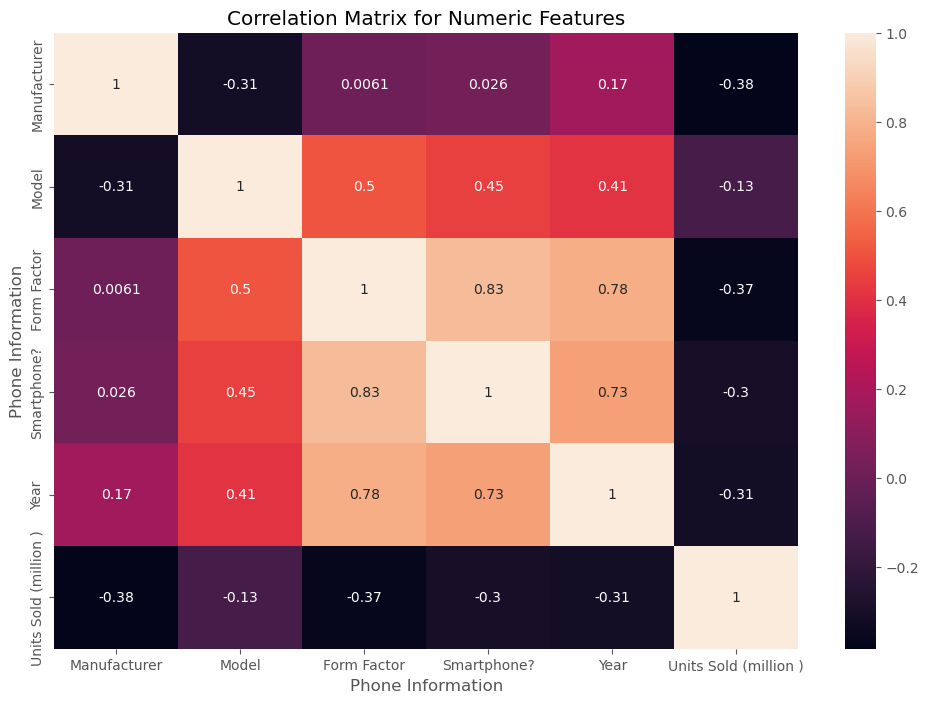

In [138]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Phone Information')
plt.ylabel('Phone Information')
plt.show()

In [126]:
df_numerized['Units Sold (million )']

0      250.0
1      247.5
2      222.4
3      200.0
4      174.1
5      164.5
6      161.0
7      159.9
8      159.2
9      151.1
10     150.0
11     150.0
12     150.0
13     150.0
14     146.2
15     135.0
16     130.0
17     130.0
18     126.0
19     124.7
20     100.0
21     100.0
22     100.0
23      75.0
24      70.0
25      70.0
26      65.0
27      63.0
28      60.0
29      60.0
30      60.0
31      60.0
32      55.0
33      50.0
34      50.0
35      50.0
36      47.0
37      45.0
38      45.0
39      41.0
40      40.0
41      37.0
42      35.4
43      35.0
44      35.0
45      32.0
46      30.3
47      30.0
48      30.0
49      30.0
50      30.0
51      30.0
52      29.0
53      28.0
54      25.0
55      24.2
56      24.2
57      24.2
58      23.2
59      23.1
60      21.0
61      20.0
62      20.0
63      20.0
64      19.4
65      17.0
66      17.0
67      16.9
68      16.0
69      15.8
70      15.3
71      15.2
72      15.0
73      15.0
74      15.0
75      15.0
76      15.0

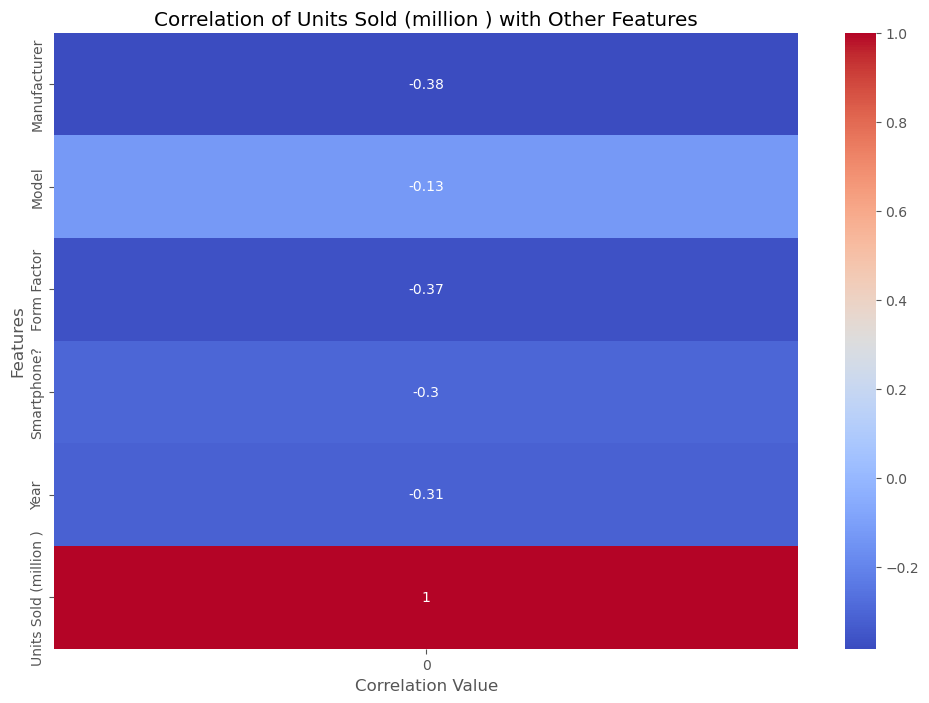

In [146]:
column_of_interest = 'Units Sold (million )'
correlation_with_column = df_numerized.corr(method='pearson')[column_of_interest]

correlation_with_column = correlation_with_column.to_numpy().reshape(-1, 1)

sns.heatmap(correlation_with_column, annot=True, cmap='coolwarm', yticklabels=df_numerized.columns)
plt.title(f'Correlation of {column_of_interest} with Other Features')
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.show()


So the highest correlation we have with the Units Sold are:
1. Model
2. Smartphone?
3. Year